<a href="https://colab.research.google.com/github/wagnerantsilva/posuna-ia-nb/blob/estudo%2FNltk-Tokenizacao-e-Bag-of-Words/ESTUDO_Tokeniza%C3%A7%C3%A3o_e_Bag_of_Words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tokenização e Bag-of-Words**

DATASET - Machado

In [64]:
!pip install nltk==3.5

#TOKENISATION

In [65]:
import nltk
import re
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [66]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('machado')

# retorna lista de stopwords em portugues
stopwords = nltk.corpus.stopwords.words('portuguese')

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import machado
machado.fileids()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package machado to /root/nltk_data...
[nltk_data]   Package machado is already up-to-date!


['contos/macn001.txt',
 'contos/macn002.txt',
 'contos/macn003.txt',
 'contos/macn004.txt',
 'contos/macn005.txt',
 'contos/macn006.txt',
 'contos/macn007.txt',
 'contos/macn008.txt',
 'contos/macn009.txt',
 'contos/macn010.txt',
 'contos/macn011.txt',
 'contos/macn012.txt',
 'contos/macn013.txt',
 'contos/macn014.txt',
 'contos/macn015.txt',
 'contos/macn016.txt',
 'contos/macn017.txt',
 'contos/macn018.txt',
 'contos/macn019.txt',
 'contos/macn020.txt',
 'contos/macn021.txt',
 'contos/macn022.txt',
 'contos/macn023.txt',
 'contos/macn024.txt',
 'contos/macn025.txt',
 'contos/macn026.txt',
 'contos/macn027.txt',
 'contos/macn028.txt',
 'contos/macn029.txt',
 'contos/macn030.txt',
 'contos/macn031.txt',
 'contos/macn032.txt',
 'contos/macn033.txt',
 'contos/macn034.txt',
 'contos/macn035.txt',
 'contos/macn036.txt',
 'contos/macn037.txt',
 'contos/macn038.txt',
 'contos/macn039.txt',
 'contos/macn040.txt',
 'contos/macn041.txt',
 'contos/macn042.txt',
 'contos/macn043.txt',
 'contos/ma

In [67]:
texto = machado.raw('romance/marm05.txt')
tokens = word_tokenize(texto)
print(tokens)

['Romance', ',', 'Memórias', 'Póstumas', 'de', 'Brás', 'Cubas', ',', '1880', 'Memórias', 'Póstumas', 'de', 'Brás', 'Cubas', 'Texto-fonte', ':', 'Obra', 'Completa', ',', 'Machado', 'de', 'Assis', ',', 'Rio', 'de', 'Janeiro', ':', 'Editora', 'Nova', 'Aguilar', ',', '1994', '.', 'Publicado', 'originalmente', 'em', 'folhetins', ',', 'a', 'partir', 'de', 'março', 'de', '1880', ',', 'na', 'Revista', 'Brasileira', '.', 'Ao', 'verme', 'que', 'primeiro', 'roeu', 'as', 'frias', 'carnes', 'do', 'meu', 'cadáver', 'dedico', 'como', 'saudosa', 'lembrança', 'estas', 'Memórias', 'Póstumas', 'Prólogo', 'da', 'terceira', 'edição', 'A', 'primeira', 'edição', 'destas', 'Memórias', 'Póstumas', 'de', 'Brás', 'Cubas', 'foi', 'feita', 'aos', 'pedaços', 'na', 'Revista', 'Brasileira', ',', 'pelos', 'anos', 'de', '1880', '.', 'Postas', 'mais', 'tarde', 'em', 'livro', ',', 'corrigi', 'o', 'texto', 'em', 'vários', 'lugares', '.', 'Agora', 'que', 'tive', 'de', 'o', 'rever', 'para', 'a', 'terceira', 'edição', ',', '

sent_tokenize, podemos tokenizar as frases do texto, ou seja, dividir o texto em frases. Vale ressaltar que para isso, o texto precisa estar com pontuação, já que essa função utiliza os pontos finais como parâmetro de onde cortar o texto.

In [68]:
sent_tokens = sent_tokenize(texto)
print(sent_tokens)

['Romance, Memórias Póstumas de Brás Cubas, 1880\n\nMemórias Póstumas de\nBrás Cubas\n\nTexto-fonte:\nObra Completa, Machado de\nAssis,\nRio\nde Janeiro: Editora Nova Aguilar, 1994.', 'Publicado originalmente em\nfolhetins, a partir de março de 1880, na Revista Brasileira.', 'Ao verme\nque\nprimeiro roeu as frias\ncarnes\ndo meu cadáver\n\ndedico\ncomo saudosa lembrança\n\nestas\nMemórias\nPóstumas\n\nPrólogo da terceira\nedição\n\nA primeira edição destas\nMemórias Póstumas de Brás Cubas foi feita aos pedaços na Revista\nBrasileira, pelos anos de 1880.', 'Postas mais tarde em livro, corrigi o texto em\nvários lugares.', 'Agora que tive de o rever para a terceira edição, emendei ainda\nalguma coisa e suprimi duas ou três dúzias de linhas.', 'Assim composta, sai\nnovamente à luz esta obra que alguma benevolência parece ter encontrado no\npúblico.', 'Capistrano de Abreu, noticiando a\npublicação do livro, perguntava: \x93As Memórias Póstumas de Brás Cubas são\num romance?\x94 Macedo Soar

In [69]:
def pre_processamento(texto):

    # seleciona apenas letras e coloca todas em minúsculo
    letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', texto.lower())

    # remove stopwords
    stopwords = nltk.corpus.stopwords.words('portuguese')
    stop = set(stopwords)
    sem_stopwords = [w for w in letras_min if w not in stop]

    # juntando os tokens novamente em formato de texto
    texto_limpo = " ".join(sem_stopwords)

    return texto_limpo

In [70]:
pre_processamento(texto)

'romance memórias póstumas brás cubas memórias póstumas brás cubas texto fonte obra completa machado assis rio janeiro editora nova aguilar publicado originalmente folhetins partir março revista brasileira verme primeiro roeu frias carnes cadáver dedico saudosa lembrança memórias póstumas prólogo terceira edição primeira edição destas memórias póstumas brás cubas feita pedaços revista brasileira anos postas tarde livro corrigi texto vários lugares agora rever terceira edição emendei ainda alguma coisa suprimi duas três dúzias linhas assim composta sai novamente luz obra alguma benevolência parece ter encontrado público capistrano abreu noticiando publicação livro perguntava memórias póstumas brás cubas romance macedo soares carta escreveu tempo recordava amigamente viagens terra primeiro respondia defunto brás cubas leitor viu verá prólogo vai adiante sim romance uns outros quanto segundo assim explicou finado trata obra difusa brás cubas adotei forma livre sterne xavier maistre sei me

## **corpus dom casmurro**

In [71]:
corpus_dom_casmurro = nltk.corpus.machado.raw('romance/marm08.txt')

## pre processamento

In [72]:
texto = pre_processamento(corpus_dom_casmurro)

## tokenizando

In [73]:
tokens = word_tokenize(texto)

## contagem de frequencia

In [74]:
fd = FreqDist(tokens)
print("20 palavras mais frequentes:")
print(fd.most_common(20))

20 palavras mais frequentes:
[('capitu', 341), ('mãe', 229), ('dias', 192), ('tudo', 189), ('capítulo', 188), ('disse', 184), ('casa', 170), ('olhos', 164), ('mim', 162), ('josé', 160), ('assim', 158), ('vez', 147), ('agora', 146), ('ainda', 141), ('outra', 138), ('nada', 135), ('lo', 127), ('tão', 122), ('tempo', 120), ('padre', 119)]


## **Plot**

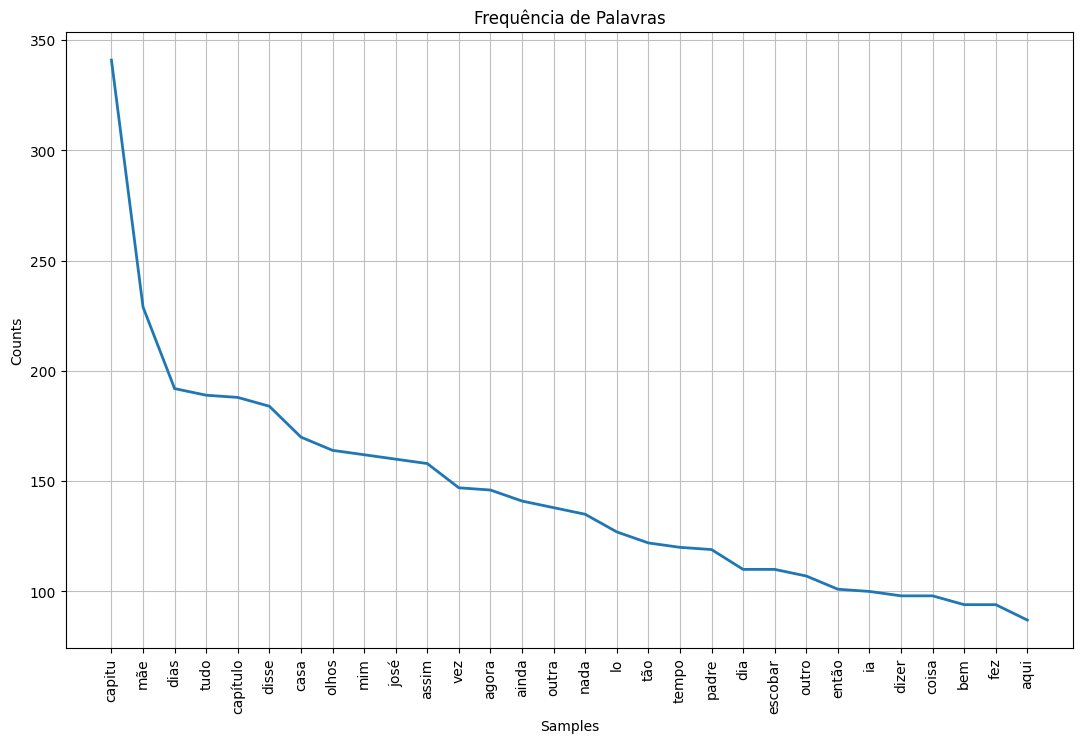

<Axes: title={'center': 'Frequência de Palavras'}, xlabel='Samples', ylabel='Counts'>

In [75]:
plt.figure(figsize = (13, 8))
fd.plot(30, title = "Frequência de Palavras")

# **Concordância**

In [76]:
dom_casmurro = nltk.Text(word_tokenize(texto))
dom_casmurro.concordance('capitu')

Displaying 25 of 341 matches:
asta idade bentinho mal quinze anos capitu fez quatorze semana passada dois cr
oisa brincadeira arranjávamos altar capitu servia sacristão alterávamos ritual
e viva ar mesma opinião então amava capitu capitu mim realmente andava cosido 
ar mesma opinião então amava capitu capitu mim realmente andava cosido saias o
retanto matéria conversações sempre capitu chamava vezes bonito mocetão flor o
indíssimos fazer dizia lindos então capitu abanava cabeça grande expressão des
ia alguma frase algum gesto contava capitu dia notou diferença dizendo bonitos
fenômeno recente acordar pensamento capitu escutá la memória estremecer ouvia 
ndade demais virtudes eternas amava capitu capitu amava pernas andavam desanda
emais virtudes eternas amava capitu capitu amava pernas andavam desandavam est
naturalmente primeira capítulo xiii capitu repente ouvi bradar voz dentro casa
ente ouvi bradar voz dentro casa pé capitu quintal mamãe outra vez casa vem cá
orta comunicação manda

## Similaridade

In [77]:
dom_casmurro.similar('mãe')

mim falou tanto bolso outra assim fim seminário podia morreu estudante
importa súplicas saí


# **Bigramas**

In [78]:
dom_casmurro.collocations()

josé dias; prima justina; tio cosme; mata cavalos; padre cabral; outra
vez; alguma coisa; alguns instantes; outra coisa; muita vez; dia
seguinte; engenho novo; rio janeiro; dom casmurro; protonotário
apostólico; tique tique; ave marias; mana glória; oblíqua dissimulada;
quinze anos


## **Gráfico de Dispersão**

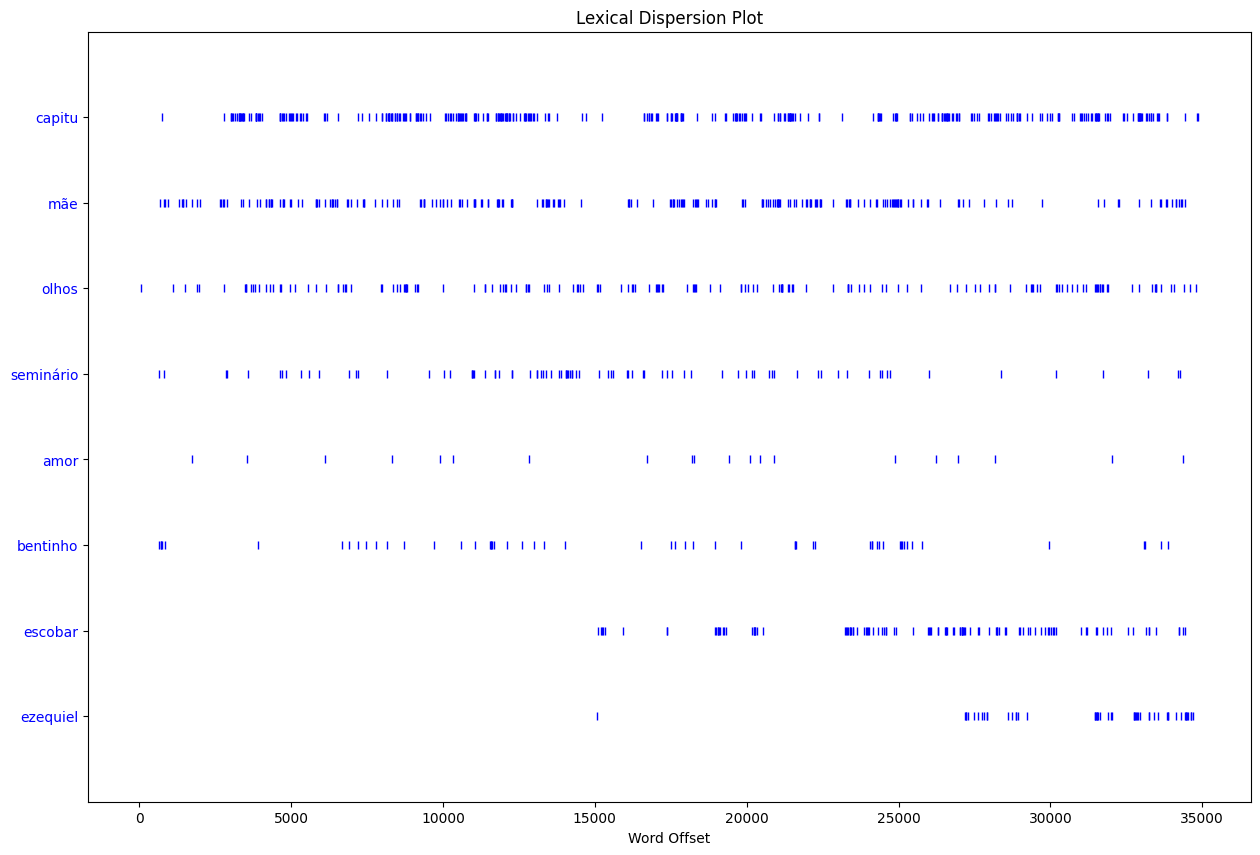

In [79]:
plt.figure(figsize=(15, 10))
dom_casmurro.dispersion_plot(['capitu', 'mãe', 'olhos', 'seminário', 'amor', 'bentinho', 'escobar','ezequiel'])